"Employee Attrition "
In this project, I developed a machine learning model to predict employee attrition (whether employees are likely to leave the company) based on various features such as job satisfaction, work environment, salary, and more. The goal was to build a predictive model that can help HR departments / Managers to identify employees at risk of leaving and take proactive measures to improve retention.

Importing necessary Librarys

Accuracy: 0.8741496598639455
Cross validation Accuracy Scores: [0.86394558 0.83673469 0.8707483  0.85714286 0.8707483  0.85034014
 0.85034014 0.87755102 0.84353741 0.86394558]
Mean Cross validation Accuracy: 0.8585034013605443
Standard Deviation of Cross validation Accuracy Scores: 0.012469593727770973

Classification Report
              precision    recall  f1-score   support

          No       0.88      0.99      0.93       255
         Yes       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294



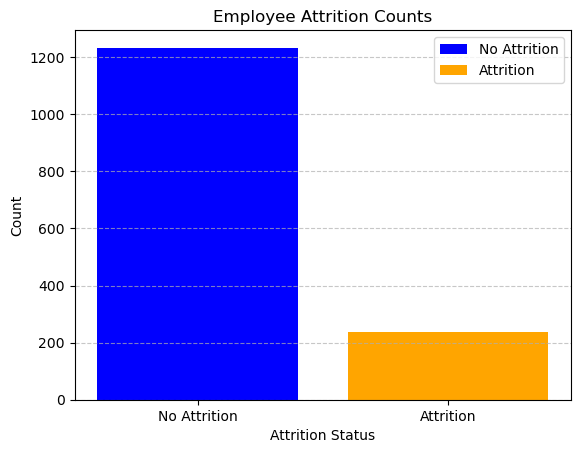

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Loading Data
data = pd.read_csv("C:/Users/ayush poladoya/Downloads/Employee-Attrition.csv")

X = data.drop('Attrition', axis=1)    
y = data['Attrition']

# Preprocessing Categorical Data with Label Encoder
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

# Evaluating model
pred = model.predict(X_test)
#print(pred)
print(f'Accuracy: {accuracy_score(y_test, pred)}')  

scores = cross_val_score(model, X, y, cv=10)
print(f'Cross validation Accuracy Scores: {scores}')
print(f'Mean Cross validation Accuracy: {scores.mean()}')
print(f'Standard Deviation of Cross validation Accuracy Scores: {scores.std()}')
print("\nClassification Report")
print(classification_report(y_test, pred))

# Plotting a bar chart for attrition counts
attrition_counts = data['Attrition'].value_counts()
attrition_counts.index = ['No Attrition', 'Attrition']
plt.bar(attrition_counts.index, attrition_counts.values, color=['blue', 'orange'], label=['No Attrition', 'Attrition'])
plt.title('Employee Attrition Counts')
plt.xlabel('Attrition Status')
plt.ylabel('Count')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
